Using:
    https://gist.github.com/EdwardJRoss/86b31848a7951411de56f10f55e9de4e
    https://forums.fast.ai/t/character-level-language-model/31379
    
Lesson 3 RNN


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [3]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [33]:
df = pd.read_csv('/home/trpb2/data/takeaway/raw_just_eat_broad.csv')

In [34]:
df['text'] = df.text.str.lower()

In [35]:
df[df.text.str.contains('asda kitchen', regex= True, na=False)]

,label,text
25734,Pizza,asda kitchen - cape hill
25813,Pizza,asda kitchen - wakefield
26301,Pizza,asda kitchen - hull mount pleasant
26463,Pizza,asda kitchen - toryglen
26609,Pizza,asda kitchen - barking
27042,Pizza,asda kitchen - ashton
27185,Pizza,asda kitchen - canterbury
27283,Pizza,asda kitchen - blackpool
27413,Pizza,asda kitchen - govan
27875,Pizza,asda kitchen - livingston


In [36]:
#chains to drop and replace

to_drop = df[df.text.str.contains('asda kitchen', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "asda kitchen"} , ignore_index=True)

to_drop = df[df.text.str.contains('basilico', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "basilico"} , ignore_index=True)

to_drop = df[df.text.str.contains('bella italia', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "bella italia"} , ignore_index=True)

to_drop = df[df.text.str.contains('birdbox', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Chicken' , 'text' : "birdbox"} , ignore_index=True)

to_drop = df[df.text.str.contains('blazing bird', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Chicken' , 'text' : "blazing bird"} , ignore_index=True)

to_drop = df[df.text.str.contains('burger king', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'American' , 'text' : "burger king"} , ignore_index=True)

to_drop = df[df.text.str.contains('caspian pizza', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "caspian pizza"} , ignore_index=True)

to_drop = df[df.text.str.contains('chiquito', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "chiquito"} , ignore_index=True)

to_drop = df[df.text.str.contains('firezza', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "firezza"} , ignore_index=True)

to_drop = df[df.text.str.contains("frankie & benny's", regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'American' , 'text' : "frankie & benny's"} , ignore_index=True)

to_drop = df[df.text.str.contains('gbk', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'American' , 'text' : "gourmet burger kitchen (gbk)"} , ignore_index=True)

to_drop = df[df.text.str.contains('greggs', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Sandwiches' , 'text' : "greggs"} , ignore_index=True)

to_drop = df[df.text.str.contains('harvester', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'American' , 'text' : "harvester"} , ignore_index=True)

to_drop = df[df.text.str.contains('itsu', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "itsu"} , ignore_index=True)

to_drop = df[df.text.str.contains('kfc', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Chicken' , 'text' : "kfc"} , ignore_index=True)

to_drop = df[df.text.str.contains('kick ass', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "kick ass burrito"} , ignore_index=True)

to_drop = df[df.text.str.contains('las iguanas', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "las iguanas"} , ignore_index=True)

to_drop = df[df.text.str.contains('papa john', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "papa john's"} , ignore_index=True)

to_drop = df[df.text.str.contains('pizza hut', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Pizza' , 'text' : "pizza hut"} , ignore_index=True)

to_drop = df[df.text.str.contains('stack & grill', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'American' , 'text' : "stack & grill by cafe rouge"} , ignore_index=True)

to_drop = df[df.text.str.contains('subway', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Sandwiches' , 'text' : "subway"} , ignore_index=True)

to_drop = df[df.text.str.contains('tim horton', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Sandwiches' , 'text' : "tim horton"} , ignore_index=True)

to_drop = df[df.text.str.contains('toby carvery', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'British' , 'text' : "toby carvery"} , ignore_index=True)

to_drop = df[df.text.str.contains('tortilla -', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "tortilla"} , ignore_index=True)

to_drop = df[df.text.str.contains('turtle bay', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Caribbean' , 'text' : "turtle bay"} , ignore_index=True)

to_drop = df[df.text.str.contains('wimpy', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'American' , 'text' : "wimpy"} , ignore_index=True)

to_drop = df[df.text.str.contains('yo!', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label' : 'Other' , 'text' : "yo! sushi"} , ignore_index=True)


## Character Set

What letters outside of ASCII are in the names?


In [37]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.text))) if _ not in string.ascii_letters)
foreign_chars.most_common()


[(' ', 78960),
 ("'", 57418),
 (',', 30074),
 ('"', 5668),
 ('&', 2781),
 ('-', 1306),
 ('(', 305),
 (')', 305),
 ('’', 270),
 ('2', 240),
 ('1', 222),
 ('.', 220),
 ('@', 204),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 55),
 ('6', 52),
 ('5', 52),
 ('é', 31),
 ('`', 26),
 ('!', 24),
 ('´', 19),
 ('/', 14),
 ('+', 7),
 ('‘', 7),
 ('#', 7),
 ('?', 4),
 ('ê', 4),
 ('–', 4),
 (':', 4),
 ('°', 3),
 ('*', 3),
 ('ó', 2),
 ('è', 2),
 ('ö', 2),
 ('%', 2),
 ('[', 1),
 ('á', 1),
 ('ü', 1),
 ('®', 1),
 ('\\', 1),
 ('~', 1),
 ('ä', 1),
 (']', 1)]

In [38]:
df['ascii_name'] = df.text.apply(lambda x: unidecode(str(x)))
df[df.text != df.ascii_name]

,label,text,ascii_name
57,African,izatu’s kitchen,izatu's kitchen
108,African,ruby’s bar and cuisine,ruby's bar and cuisine
146,African,afromumii @ lovelygloworm café,afromumii @ lovelygloworm cafe
179,American,friendly phil’s chatham,friendly phil's chatham
189,Chicken,lesley’s hot wings,lesley's hot wings
308,American,hot ´n´ tender l1,hot 'n' tender l1
323,American,auntie anne’s,auntie anne's
366,American,harlie’s,harlie's
397,American,roxy’s bistro bar,roxy's bistro bar
426,American,raindell’s,raindell's


In [39]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 78960),
 ("'", 57148),
 (',', 30074),
 ('"', 6234),
 ('&', 2781),
 ('-', 1310),
 ('(', 306),
 (')', 306),
 ('2', 240),
 ('1', 222),
 ('.', 220),
 ('@', 204),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 55),
 ('6', 52),
 ('5', 52),
 ('`', 26),
 ('!', 24),
 ('/', 14),
 ('+', 7),
 ('#', 7),
 ('?', 4),
 (':', 4),
 ('*', 3),
 ('%', 2),
 ('[', 1),
 ('\\', 1),
 ('~', 1),
 (']', 1)]

In [40]:
df['ascii_name_fix'] = df.ascii_name.str.replace('`',"'")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('~'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(']'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('['," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('\\'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('%'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('*'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(':'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('+'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('/'," ")
suss_chars = ['`',']','%']
df[df.ascii_name_fix.str.contains('|'.join(suss_chars))]

,label,text,ascii_name,ascii_name_fix


## Check for duplicates


In [41]:
name_classes = df.\
  groupby('ascii_name_fix').\
  nunique().label.sort_values(ascending=False)
name_classes.head(50)

ascii_name_fix
tasty bites               7
munchies                  6
flames                    5
charcoal grill            5
grill house               5
yum yum                   5
fusion                    4
southern fried chicken    4
top taste                 4
real taste                4
the grill                 4
yummies                   4
sizzler                   4
mamma mia                 4
griller                   4
ali baba                  4
perfect fried chicken     4
marmaris                  4
spicy grill               4
the grill house           4
kebabish original         4
hot spot                  4
get stuffed               4
flavours                  4
bbq hut                   4
star cafe                 4
peri peri original        4
spice of kashmir          3
mezze                     3
spice of life             3
siciliano                 3
grillz                    3
golden grill              3
red spice                 3
istanbul grill            3
pizza

In [42]:
df_dupe = df[df.ascii_name_fix.isin(name_classes[name_classes > 1].index)]
df_dupe = df_dupe[['label','ascii_name_fix']]
piv = df_dupe.pivot_table(index = 'ascii_name_fix', values='label', columns = 'label', aggfunc=len, fill_value = 0)

In [43]:
piv.to_csv('dupes_broad.csv', sep=',')

In [44]:
df_dupe

,label,ascii_name_fix
4,Other,ariana restaurant
19,Other,ariana restaurant
70,African,cafe spice
157,Chicken,american grill peri peri
161,Chicken,dixy chicken
163,American,leo's grill
164,Pizza,flames
166,American,chicken cottage
177,Kebab,spice land
191,American,bbq express


just remove all the duplicated names

In [45]:
df = df[~df.ascii_name_fix.isin(name_classes[name_classes > 1].index)]

check for duplicate name label combinations

In [46]:
counts = df.assign(n=1).groupby(['ascii_name_fix', 'label']).count().sort_values('n', ascending=False)
counts.head(n=20)

,,text,ascii_name,n
ascii_name_fix,label,,,
china garden,Chinese,35,35,35
tops pizza,Pizza,32,32,32
taste of india,Indian,31,31,31
bengal spice,Indian,26,26,26
lucky star,Chinese,25,25,25
golden dragon,Chinese,25,25,25
pizza king,Pizza,25,25,25
lucky house,Chinese,23,23,23
oriental chef,Chinese,20,20,20


In [47]:
df = df.drop_duplicates(['ascii_name_fix', 'label'])


### Distribution by Language

The dataset is very unbalanced.


In [48]:
df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)

label
Indian           5426
Pizza            4603
Chinese          2627
Kebab            1963
Fish & Chips     1679
Chicken          1404
Other             864
Desserts          839
American          832
Café              780
Caribbean         435
Mediterranean     389
Thai              297
Japanese          268
Grill             206
Sandwiches        193
Mexican           190
British           184
African           138
Name: ascii_name_fix, dtype: int64


## Create Validation and Training Sets

We want our final model to work well on any language.

But if we pick our validation set uniformly at random from the data we're likely to get many Indian and not many African, which isn't a good test of this.

So instead we'll take our validation set from an equal number from each subclass.


In [49]:
df = df.reset_index().drop('index', 1)

In [50]:
counts = df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)
counts

label
Indian           5426
Pizza            4603
Chinese          2627
Kebab            1963
Fish & Chips     1679
Chicken          1404
Other             864
Desserts          839
American          832
Café              780
Caribbean         435
Mediterranean     389
Thai              297
Japanese          268
Grill             206
Sandwiches        193
Mexican           190
British           184
African           138
Name: ascii_name_fix, dtype: int64

In [51]:
valid_size = 70 # We'll pick 30 at random from each subclass
train_size = 2000 # For a balanced training set we'll pick 500 at random with replacement

In [52]:
np.random.seed(6011)
valid_idx = []
for label in counts.keys():
    # Random sample of size "valid_size" for each class
    valid_idx += list(df[df.label == label].sample(valid_size).index)

In [53]:
df['valid'] = False
df.loc[valid_idx, 'valid'] = True

In [54]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df[(df.label == label) & ~df.valid].sample(train_size, replace=True).index)

In [55]:
df.loc[balanced_idx].groupby('label').nunique().sort_values('ascii_name_fix', ascending=False)

,label,text,ascii_name,ascii_name_fix,valid
label,,,,,
Indian,1,1683,1683,1683,1
Pizza,1,1602,1602,1602,1
Chinese,1,1395,1395,1395,1
Kebab,1,1242,1242,1242,1
Fish & Chips,1,1146,1146,1146,1
Chicken,1,1021,1021,1021,1
Other,1,729,729,729,1
Desserts,1,706,706,706,1
American,1,696,696,696,1


Let's record our balanced set in the dataframe: this will make it easy to reload at a later point.

In [56]:
df['bal'] = 0
for k, v in Counter(balanced_idx).items():
    df.loc[k, 'bal'] += v

In [57]:
df.to_csv('names_clean_broad.csv', index=False)

## Build a Fastai Data Loader

Load in the dataframe and extract indexes for training, validation and balanced trainings.

In [58]:
df = pd.read_csv('names_clean_broad.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [59]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [60]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [61]:
itos

['xxunk',
 'xxbos',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 ' ',
 '-',
 "'",
 '@',
 '&',
 ')',
 '(',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [62]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [63]:
train_df = df.iloc[train_idx, [0,3]]
bal_df = df.iloc[bal_idx, [0,3]]
valid_df = df.iloc[valid_idx, [0,3]]

## Language model

Language model with Just Eat data only

In [120]:
data = TextLMDataBunch.from_df(path='.', train_df=train_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab, text_cols=1, mark_fields=False, bs=512)

In [121]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

In [122]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


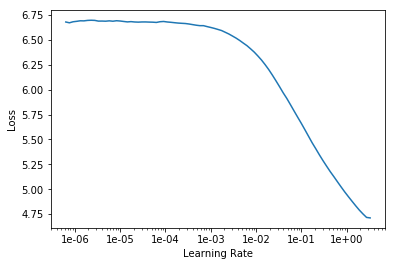

In [123]:
learn.recorder.plot()

In [124]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.934874,4.621894,0.092271,00:05
1,4.780849,3.225818,0.137193,00:05
2,4.170495,3.073754,0.144085,00:05


In [125]:
learn.unfreeze()

In [126]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.093631,2.654351,0.241657,00:07
1,2.870281,2.446944,0.316406,00:07
2,2.660801,2.088234,0.415653,00:07
3,2.467499,2.038250,0.425223,00:07
4,2.305543,1.810131,0.470006,00:07
5,2.174372,1.752905,0.487863,00:07
6,2.065588,1.707525,0.503376,00:07
7,1.976489,1.684211,0.509319,00:07
8,1.909897,1.676770,0.509961,00:07
9,1.861007,1.675682,0.511105,00:07


In [129]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.703973,1.669288,0.510993,00:07
1,1.686460,1.647782,0.520982,00:07
2,1.664503,1.607581,0.530022,00:07
3,1.638346,1.568180,0.542969,00:07
4,1.611604,1.530332,0.553320,00:07
5,1.590198,1.514774,0.558315,00:07
6,1.563289,1.500473,0.561384,00:07
7,1.545529,1.501745,0.564286,00:07
8,1.535200,1.491812,0.563811,00:07
9,1.516340,1.492171,0.564481,00:07


In [130]:
TEXT = "bob"
N_WORDS = 100
N_SENTENCES = 50

In [131]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

bob b e a n   c a f e xxbos   o r i e n t a l   i n d i a n xxbos   p i z z a   l o u n g e xxbos   c a s t y ' s   e x p r e s s xxbos   s h a n a   i n d i a n   t a k e a w a y xxbos   o l i v e n   c h i p p y xxbos   m e m
bob a b o b a b   h o u s e xxbos   p a r k a ' s   b a l t i xxbos   n a s a   w a t i b b e a n   f o o d xxbos   p i z z a   o r o xxbos   m i n g t o   c a f e xxbos   l i t t l e   f i s h   &   c h i p s xxbos   m i r a n
bob b l u e   t a n d o o r i xxbos   a r e d   p i z z a xxbos   f a i l a   p i z z a   &   b e n g a l xxbos   a l   b e l l o p xxbos   s p i c e   o f   i t a l i a n xxbos   m i n n a xxbos   a m a xxbos   s u n b y   h u t xxbos
bob b a b s   &   p i z z a xxbos   t a t h e   a r d i n a xxbos   y o u n g   k e b a b   h o u s e xxbos   j o h   g r e e n xxbos   i n d i a n   r e s t a u r a n t xxbos   r i z z e r i a xxbos   t h e   r a j   a r t h a
bob b l e y   b u r g e r s xxbos   a m b e r   t h a i   k i t c h e n xxbos   

In [132]:
learn.save_encoder('just_eat_enc')

## Classifier with Just Eat data

In [64]:
data = TextClasDataBunch.from_df(path='.', train_df=bal_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab,
                         mark_fields=False, bs=512)

In [12]:
data.show_batch()

text,target
d i a g o ' s d e l i h o t s a n d w i c h ' s a n d g o u r m e t b u r g e r s n w,Café
d i a g o ' s d e l i h o t s a n d w i c h ' s a n d g o u r m e t b u r g e r s n w,Café
f l a v a z a u t h e n t i c c a r i b b e a n f o o d & e n g l i s h t a k e a w a y,Caribbean
d i a g o ' s d e l i h o t s a n d w i c h ' s a n d g o u r m e t b u r g e r s n w,Café
f l a v a z a u t h e n t i c c a r i b b e a n f o o d & e n g l i s h t a k e a w a y,Caribbean


In [65]:
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.5, bptt=50)


In [66]:
learn.load_encoder('just_eat_enc')

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


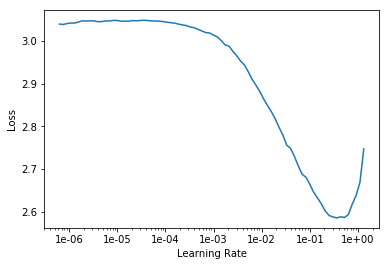

In [27]:
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.690860,2.181843,0.385714,00:06
1,2.420944,2.034701,0.430075,00:06
2,2.289945,1.972908,0.445865,00:06
3,2.225499,1.987607,0.452632,00:06
4,2.188981,1.962412,0.452632,00:06
5,2.167767,1.955865,0.472932,00:06
6,2.112952,1.930340,0.477444,00:06
7,2.098940,1.917257,0.473684,00:06
8,2.095457,1.920982,0.480451,00:06
9,2.071710,1.916813,0.482707,00:06


In [68]:
learn.unfreeze()

In [69]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.986412,1.904971,0.483459,00:15
1,1.860754,1.862435,0.500752,00:14
2,1.708490,1.741476,0.529323,00:14
3,1.556543,1.681278,0.541353,00:15
4,1.407412,1.710954,0.551880,00:14
5,1.296719,1.679275,0.564662,00:14
6,1.191691,1.679564,0.569925,00:15
7,1.109235,1.684681,0.569173,00:15
8,1.069174,1.673301,0.574436,00:15
9,1.027714,1.673554,0.569925,00:14


In [70]:
    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`"
        x=torch.arange(0,data.c)
        cm = ((self.pred_class==x[:,None]) & (self.y_true==x[:,None,None])).sum(2)
        return cm.cpu().numpy()

    def plot_confusion_matrix(self, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = self.confusion_matrix()
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, self.data.classes, rotation=45)
        plt.yticks(tick_marks, self.data.classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [71]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

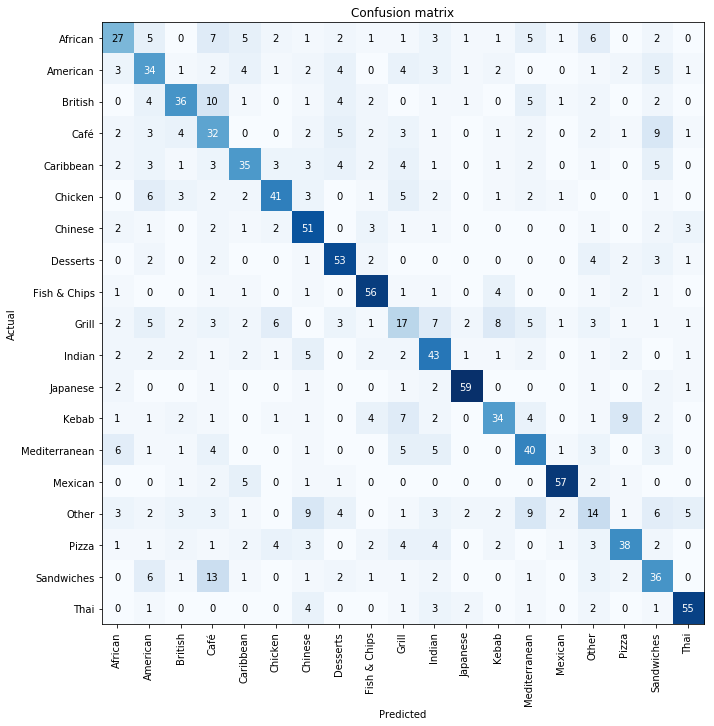

In [72]:
interp.plot_confusion_matrix(figsize=(10,10))

In [73]:
interp.most_confused()

[('Sandwiches', 'Café', 13),
 ('British', 'Café', 10),
 ('Café', 'Sandwiches', 9),
 ('Kebab', 'Pizza', 9),
 ('Other', 'Chinese', 9),
 ('Other', 'Mediterranean', 9),
 ('Grill', 'Kebab', 8),
 ('African', 'Café', 7),
 ('Grill', 'Indian', 7),
 ('Kebab', 'Grill', 7),
 ('African', 'Other', 6),
 ('Chicken', 'American', 6),
 ('Grill', 'Chicken', 6),
 ('Mediterranean', 'African', 6),
 ('Other', 'Sandwiches', 6),
 ('Sandwiches', 'American', 6),
 ('African', 'American', 5),
 ('African', 'Caribbean', 5),
 ('African', 'Mediterranean', 5),
 ('American', 'Sandwiches', 5),
 ('British', 'Mediterranean', 5),
 ('Café', 'Desserts', 5),
 ('Caribbean', 'Sandwiches', 5),
 ('Chicken', 'Grill', 5),
 ('Grill', 'American', 5),
 ('Grill', 'Mediterranean', 5),
 ('Indian', 'Chinese', 5),
 ('Mediterranean', 'Grill', 5),
 ('Mediterranean', 'Indian', 5),
 ('Mexican', 'Caribbean', 5),
 ('Other', 'Thai', 5),
 ('American', 'Caribbean', 4),
 ('American', 'Desserts', 4),
 ('American', 'Grill', 4),
 ('British', 'American', 

In [87]:
learn.predict("mamoods mirch")

(Category Kebab,
 tensor(6),
 tensor([0.0278, 0.0902, 0.0827, 0.0335, 0.1813, 0.1643, 0.1862, 0.0388, 0.1442,
         0.0511]))

In [73]:
learn.predict("fryer tuck")

(Category Fish & Chips,
 tensor(4),
 tensor([0.0055, 0.0201, 0.0907, 0.1009, 0.5261, 0.0095, 0.0979, 0.0882, 0.0433,
         0.0179]))

In [74]:
learn.predict("pearl palace")

(Category Chinese,
 tensor(3),
 tensor([0.0058, 0.0033, 0.0030, 0.8568, 0.0034, 0.0395, 0.0318, 0.0284, 0.0135,
         0.0145]))

In [76]:
learn.predict("jerk house")

(Category Caribbean,
 tensor(1),
 tensor([6.3075e-03, 9.6294e-01, 4.9210e-03, 8.0615e-03, 1.4554e-03, 3.3974e-03,
         3.4982e-03, 7.4204e-03, 7.7911e-04, 1.2150e-03]))

In [84]:
learn.predict("abra kebabra")

(Category Kebab,
 tensor(6),
 tensor([9.8209e-05, 2.7411e-05, 8.0890e-05, 4.3034e-06, 1.8611e-05, 1.0272e-04,
         9.9698e-01, 2.9468e-05, 2.6527e-03, 3.6931e-06]))

In [83]:
learn.predict("mcdoner")

(Category Fish & Chips,
 tensor(4),
 tensor([0.0709, 0.0430, 0.1342, 0.0502, 0.2228, 0.0313, 0.1281, 0.1339, 0.1233,
         0.0624]))

In [79]:
learn.predict("southern fried rooster")

(Category Chicken,
 tensor(2),
 tensor([0.0057, 0.0097, 0.7755, 0.0151, 0.0187, 0.0047, 0.0882, 0.0409, 0.0228,
         0.0187]))

In [80]:
learn.predict("luigis pizza parlour")

(Category Pizza,
 tensor(8),
 tensor([1.3904e-03, 1.1355e-03, 9.9465e-03, 2.4392e-03, 8.5523e-03, 7.8015e-03,
         5.5586e-02, 3.2298e-03, 9.0967e-01, 2.5205e-04]))

In [81]:
learn.predict("mrs boggins sandwich shop")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([5.9428e-04, 1.0694e-02, 2.5535e-03, 1.1006e-03, 4.2349e-03, 1.2717e-03,
         6.6730e-04, 1.1268e-01, 7.4848e-04, 8.6546e-01]))

In [82]:
learn.predict("codfather")

(Category Sandwich / Coffee Shops / Bakery,
 tensor(9),
 tensor([0.0103, 0.0076, 0.0159, 0.0115, 0.1967, 0.0130, 0.0457, 0.1468, 0.0166,
         0.5359]))

In [87]:
2.6 ** 4

45.69760000000001

In [88]:
2.6^4

TypeError: unsupported operand type(s) for ^: 'float' and 'int'